In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn import metrics


In [40]:
dataset = pd.read_excel("D:/Coding/CRP/main/csv files/CRP_data.xlsx", sheet_name="Sheet1")

In [41]:
dataset

,Year,City,Population (in Thousand) (2011)+,Criminal damage and arson,Murder,Rape,Assualt,Theft offences
0,2014,Mumbai,15000,226,745,1223,2006,10112
1,2015,Mumbai,15000,246,815,1206,2104,10278
2,2016,Mumbai,15000,197,750,1187,2268,10036
3,2017,Mumbai,15000,231,790,1306,2097,10182
4,2018,Mumbai,15000,202,855,1366,2341,10073
5,2019,Mumbai,15000,156,832,1389,2290,10243
6,2020,Mumbai,15000,188,879,1320,2113,10014
7,2021,Mumbai,15000,190,815,1374,2479,10104
8,2014,Pune,6000,70,654,420,940,4553
9,2015,Pune,6000,72,687,436,982,4867


In [42]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Year                              32 non-null     int64 
 1   City                              32 non-null     object
 2   Population (in Thousand) (2011)+  32 non-null     int64 
 3   Criminal damage and arson         32 non-null     int64 
 4   Murder                            32 non-null     int64 
 5   Rape                              32 non-null     int64 
 6   Assualt                           32 non-null     int64 
 7   Theft offences                    32 non-null     int64 
dtypes: int64(7), object(1)
memory usage: 2.1+ KB


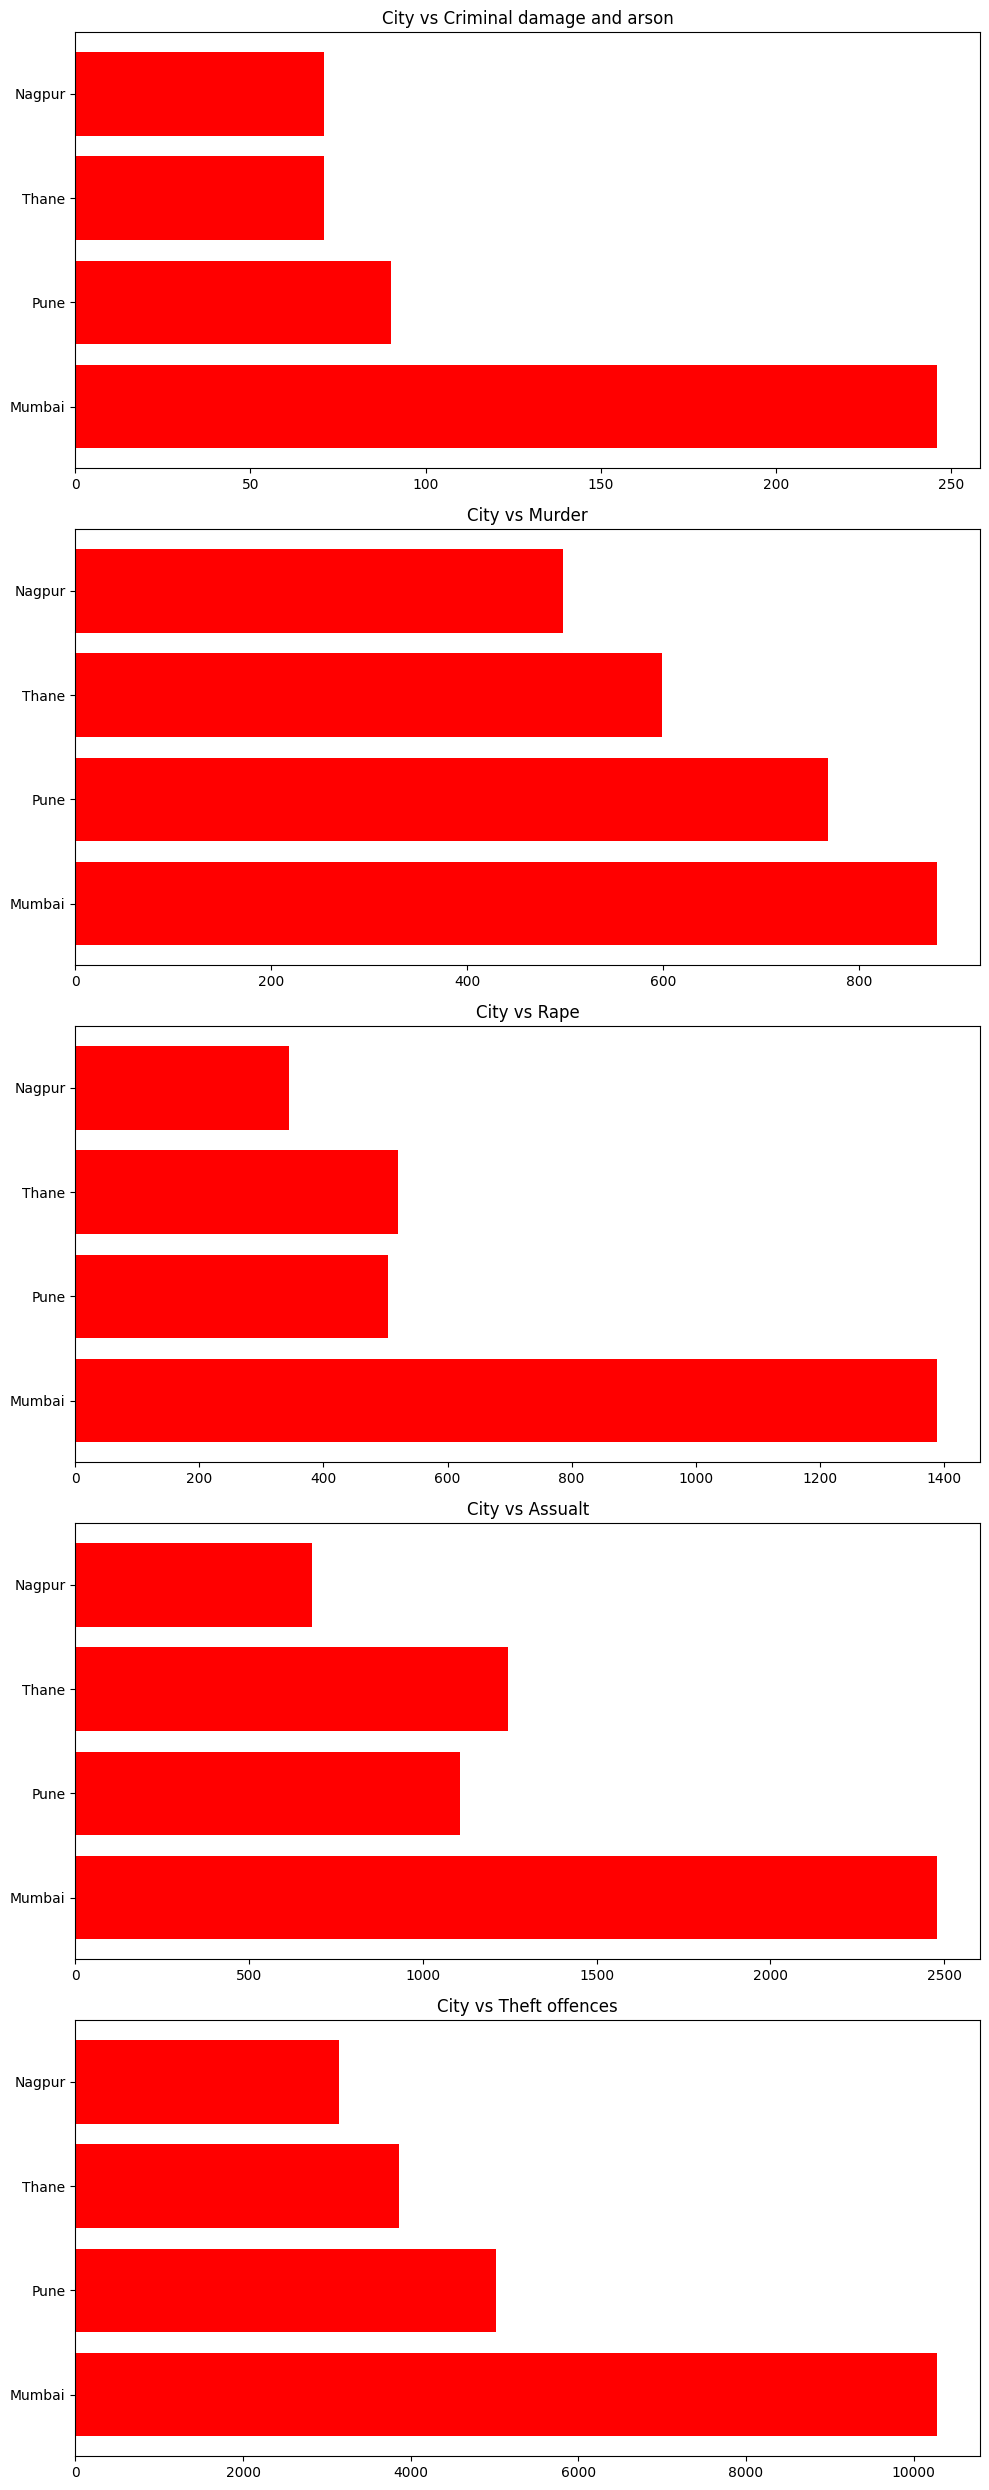

In [43]:
import matplotlib.pyplot as plt

num_crime_categories = len(dataset.columns) - 3  # Number of crime categories excluding 'Year' and 'City'
fig, ax = plt.subplots(num_crime_categories, 1, figsize=(10, 5*num_crime_categories))

crime_columns = dataset.columns[3:]  # Exclude 'Year' and 'City' columns
for i in range(num_crime_categories):
    ax[i].barh(dataset['City'], dataset[crime_columns[i]], color='Red')
    ax[i].set_title('City vs ' + crime_columns[i])

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [44]:
import pandas as pd

new_df = pd.DataFrame(columns=['Year', 'City', 'Population (in Thousand) (2011)+', 'Number Of Cases', 'Type'])

for i in range(3, 8):
    temp = dataset[['Year', 'City', 'Population (in Thousand) (2011)+']].copy()
    temp['Number Of Cases'] = dataset[dataset.columns[i]]
    temp['Type'] = dataset.columns[i]
    
    # Check if temp contains any non-null values
    if not temp.dropna(subset=['Year', 'City', 'Population (in Thousand) (2011)+', 'Number Of Cases', 'Type']).empty:
        new_df = pd.concat([new_df, temp])

# Reset index after concatenation
new_df.reset_index(drop=True, inplace=True)



In [45]:
new_df

,Year,City,Population (in Thousand) (2011)+,Number Of Cases,Type
0,2014,Mumbai,15000,226,Criminal damage and arson
1,2015,Mumbai,15000,246,Criminal damage and arson
2,2016,Mumbai,15000,197,Criminal damage and arson
3,2017,Mumbai,15000,231,Criminal damage and arson
4,2018,Mumbai,15000,202,Criminal damage and arson
...,...,...,...,...,...
155,2017,Nagpur,1500,2951,Theft offences
156,2018,Nagpur,1500,3065,Theft offences
157,2019,Nagpur,1500,2784,Theft offences
158,2020,Nagpur,1500,3142,Theft offences


In [46]:
new_df['Crime Rate'] = new_df['Number Of Cases'] / new_df['Population (in Thousand) (2011)+']

In [47]:
new_df

,Year,City,Population (in Thousand) (2011)+,Number Of Cases,Type,Crime Rate
0,2014,Mumbai,15000,226,Criminal damage and arson,0.015067
1,2015,Mumbai,15000,246,Criminal damage and arson,0.0164
2,2016,Mumbai,15000,197,Criminal damage and arson,0.013133
3,2017,Mumbai,15000,231,Criminal damage and arson,0.0154
4,2018,Mumbai,15000,202,Criminal damage and arson,0.013467
...,...,...,...,...,...,...
155,2017,Nagpur,1500,2951,Theft offences,1.967333
156,2018,Nagpur,1500,3065,Theft offences,2.043333
157,2019,Nagpur,1500,2784,Theft offences,1.856
158,2020,Nagpur,1500,3142,Theft offences,2.094667


In [48]:
new_df = new_df.drop(['Number Of Cases'], axis=1)

In [49]:
new_df

,Year,City,Population (in Thousand) (2011)+,Type,Crime Rate
0,2014,Mumbai,15000,Criminal damage and arson,0.015067
1,2015,Mumbai,15000,Criminal damage and arson,0.0164
2,2016,Mumbai,15000,Criminal damage and arson,0.013133
3,2017,Mumbai,15000,Criminal damage and arson,0.0154
4,2018,Mumbai,15000,Criminal damage and arson,0.013467
...,...,...,...,...,...
155,2017,Nagpur,1500,Theft offences,1.967333
156,2018,Nagpur,1500,Theft offences,2.043333
157,2019,Nagpur,1500,Theft offences,1.856
158,2020,Nagpur,1500,Theft offences,2.094667


In [50]:
# Save the file
new_df.to_excel("D:/Coding/Crime-Prediction/Dataset/new_dataset.xlsx", index=False, sheet_name='Sheet1')

In [51]:
new_dataset = pd.read_excel("D:/Coding/Crime-Prediction/Dataset/new_dataset.xlsx", sheet_name="Sheet1")

In [52]:
new_dataset

,Year,City,Population (in Thousand) (2011)+,Type,Crime Rate
0,2014,Mumbai,15000,Criminal damage and arson,0.015067
1,2015,Mumbai,15000,Criminal damage and arson,0.016400
2,2016,Mumbai,15000,Criminal damage and arson,0.013133
3,2017,Mumbai,15000,Criminal damage and arson,0.015400
4,2018,Mumbai,15000,Criminal damage and arson,0.013467
...,...,...,...,...,...
155,2017,Nagpur,1500,Theft offences,1.967333
156,2018,Nagpur,1500,Theft offences,2.043333
157,2019,Nagpur,1500,Theft offences,1.856000
158,2020,Nagpur,1500,Theft offences,2.094667


In [53]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Year                              160 non-null    int64  
 1   City                              160 non-null    object 
 2   Population (in Thousand) (2011)+  160 non-null    int64  
 3   Type                              160 non-null    object 
 4   Crime Rate                        160 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.4+ KB


In [54]:
new_dataset.describe()

,Year,Population (in Thousand) (2011)+,Crime Rate
count,160.000000,160.000000,160.000000
mean,2017.500000,6250.000000,0.366322
std,2.298482,5337.655481,0.499631
min,2014.000000,1500.000000,0.010000
25%,2015.750000,2250.000000,0.063525
50%,2017.500000,4250.000000,0.164250
75%,2019.250000,8250.000000,0.444167
max,2021.000000,15000.000000,2.094667


In [55]:
le = LabelEncoder()

In [56]:
new_dataset['City'] = le.fit_transform(new_dataset['City'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [57]:
# Saving the mapping file for further use
file = open('D:/Coding/Crime-Prediction/Mapping/City_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Mumbai - 0

Nagpur - 1

Pune - 2

Thane - 3



In [58]:
new_dataset['Type'] = le.fit_transform(new_dataset['Type'])
mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [59]:
# Saving the mapping file for further use
file = open('D:/Coding/Crime-Prediction/Mapping/Type_Mapping.txt', 'wt')
for key,val in mapping.items():
    print(str(key) + " - " + str(val) + '\n')
    file.write(str(key) + " - " + str(val) + '\n')

Assualt - 0

Criminal damage and arson - 1

Murder - 2

Rape - 3

Theft offences - 4



In [60]:
new_dataset

,Year,City,Population (in Thousand) (2011)+,Type,Crime Rate
0,2014,0,15000,1,0.015067
1,2015,0,15000,1,0.016400
2,2016,0,15000,1,0.013133
3,2017,0,15000,1,0.015400
4,2018,0,15000,1,0.013467
...,...,...,...,...,...
155,2017,1,1500,4,1.967333
156,2018,1,1500,4,2.043333
157,2019,1,1500,4,1.856000
158,2020,1,1500,4,2.094667


In [61]:
x = new_dataset[new_dataset.columns[0:4]].values
x

array([[ 2014,     0, 15000,     1],
       [ 2015,     0, 15000,     1],
       [ 2016,     0, 15000,     1],
       [ 2017,     0, 15000,     1],
       [ 2018,     0, 15000,     1],
       [ 2019,     0, 15000,     1],
       [ 2020,     0, 15000,     1],
       [ 2021,     0, 15000,     1],
       [ 2014,     2,  6000,     1],
       [ 2015,     2,  6000,     1],
       [ 2016,     2,  6000,     1],
       [ 2017,     2,  6000,     1],
       [ 2018,     2,  6000,     1],
       [ 2019,     2,  6000,     1],
       [ 2020,     2,  6000,     1],
       [ 2021,     2,  6000,     1],
       [ 2014,     3,  2500,     1],
       [ 2015,     3,  2500,     1],
       [ 2016,     3,  2500,     1],
       [ 2017,     3,  2500,     1],
       [ 2018,     3,  2500,     1],
       [ 2019,     3,  2500,     1],
       [ 2020,     3,  2500,     1],
       [ 2021,     3,  2500,     1],
       [ 2014,     1,  1500,     1],
       [ 2015,     1,  1500,     1],
       [ 2016,     1,  1500,     1],
 

In [62]:
y = new_dataset['Crime Rate'].values
y

array([0.01506667, 0.0164    , 0.01313333, 0.0154    , 0.01346667,
       0.0104    , 0.01253333, 0.01266667, 0.01166667, 0.012     ,
       0.01116667, 0.01316667, 0.01416667, 0.01      , 0.01466667,
       0.015     , 0.0224    , 0.024     , 0.0256    , 0.0196    ,
       0.0276    , 0.0232    , 0.0284    , 0.016     , 0.03733333,
       0.04      , 0.04266667, 0.03266667, 0.046     , 0.03866667,
       0.04733333, 0.02666667, 0.04966667, 0.05433333, 0.05      ,
       0.05266667, 0.057     , 0.05546667, 0.0586    , 0.05433333,
       0.109     , 0.1145    , 0.119     , 0.11      , 0.128     ,
       0.12183333, 0.11583333, 0.1255    , 0.192     , 0.1824    ,
       0.1968    , 0.2232    , 0.2132    , 0.2396    , 0.2072    ,
       0.2144    , 0.262     , 0.25133333, 0.256     , 0.272     ,
       0.30933333, 0.28066667, 0.332     , 0.26533333, 0.08153333,
       0.0804    , 0.07913333, 0.08706667, 0.09106667, 0.0926    ,
       0.088     , 0.0916    , 0.07      , 0.07266667, 0.08133

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=50)

In [64]:
x_train

array([[ 2020,     2,  6000,     1],
       [ 2018,     2,  6000,     3],
       [ 2016,     1,  1500,     4],
       [ 2017,     2,  6000,     0],
       [ 2015,     1,  1500,     4],
       [ 2015,     2,  6000,     4],
       [ 2017,     0, 15000,     4],
       [ 2014,     1,  1500,     3],
       [ 2021,     1,  1500,     2],
       [ 2019,     3,  2500,     1],
       [ 2017,     0, 15000,     1],
       [ 2014,     2,  6000,     3],
       [ 2014,     2,  6000,     0],
       [ 2017,     0, 15000,     0],
       [ 2015,     2,  6000,     2],
       [ 2021,     0, 15000,     1],
       [ 2020,     2,  6000,     4],
       [ 2014,     0, 15000,     4],
       [ 2015,     1,  1500,     0],
       [ 2015,     3,  2500,     0],
       [ 2014,     2,  6000,     1],
       [ 2021,     3,  2500,     0],
       [ 2015,     3,  2500,     1],
       [ 2016,     2,  6000,     2],
       [ 2014,     1,  1500,     4],
       [ 2016,     3,  2500,     1],
       [ 2017,     1,  1500,     2],
 

In [65]:
y_train

array([0.01466667, 0.06516667, 1.88333333, 0.145     , 1.79266667,
       0.81116667, 0.6788    , 0.15133333, 0.26533333, 0.0232    ,
       0.0154    , 0.07      , 0.15666667, 0.1398    , 0.1145    ,
       0.01266667, 0.79816667, 0.67413333, 0.41333333, 0.4796    ,
       0.01166667, 0.2464    , 0.024     , 0.119     , 1.97466667,
       0.0256    , 0.272     , 0.1744    , 0.14      , 0.262     ,
       0.1512    , 0.2144    , 1.544     , 0.0104    , 0.015     ,
       0.81016667, 0.4828    , 0.14086667, 0.1968    , 0.03266667,
       0.05266667, 0.75883333, 0.16716667, 0.4812    , 0.408     ,
       0.05546667, 0.484     , 0.416     , 0.01346667, 0.07866667,
       0.2396    , 0.128     , 0.168     , 0.1908    , 2.09466667,
       0.0804    , 0.782     , 0.0926    , 0.1255    , 0.16526667,
       0.04966667, 0.198     , 0.6736    , 0.2132    , 0.03866667,
       0.012     , 0.28066667, 0.0164    , 0.1636    , 0.12183333,
       0.78933333, 0.0196    , 1.97466667, 1.4468    , 0.256  

In [66]:
model1 = svm.SVR()
model1.fit(x_train, y_train)
y_pred = model1.predict(x_test)

In [67]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.34076920364084196
Mean Squared Error: 0.34216931187403693
R2 score: -0.019824829587756998


In [68]:
model2 = KNeighborsRegressor(n_neighbors=2)
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

In [69]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.25816666666666666
Mean Squared Error: 0.14771078335069449
R2 score: 0.5597526743884296


In [70]:
model3 = tree.DecisionTreeRegressor()
model3.fit(x_train, y_train)
y_pred = model3.predict(x_test)

In [71]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.02614791666666665
Mean Squared Error: 0.0028291499999999895
R2 score: 0.9915678077591882


In [72]:
model4 = RandomForestRegressor(random_state=0)
model4.fit(x_train, y_train)
y_pred = model4.predict(x_test)

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.02303619791666675
Mean Squared Error: 0.002082669846746525
R2 score: 0.9937926682848527


In [74]:
import pickle

In [75]:
#saving the model as .pkl file
pkl_filename = "D:/Coding/CRP/main/Model/model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(model4, file)

In [76]:
#checking the saved model accuracy
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
score = pickle_model.score(x_test, y_test)
print(score)

0.9937926682848527
